# Lab 1: Decision trees

## Assignment 0:

### Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn.

I think that MONK-2 is the hardest to learn. This because it is hard to pick a root node that gives a lot of additional information on the problem. Even if A5 is 0, there has to be three more 0 valued attributes and two 1 valued attributes. Basically, the resulting tree should be 6 nodes deep, since every attribute has to be checked, and the amount of "True" combinations that has to be represented within it are 6 choose 2, i.e 15. But I don't think the simplicity of the decision tree algorithm will be able to learn this problem perfectly.

## Assignment 1: 

### The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.

In [1]:
import dtree as d
import monkdata as m

train = [m.monk1, m.monk2, m.monk3]
test = [m.monk1test, m.monk2test, m.monk3test]

print("monk1\t"+"monk2\t\t\t"+"monk3")
print(d.entropy(m.monk1), end='\t')
print(d.entropy(m.monk2), end='\t')
print(d.entropy(m.monk3))

monk1	monk2			monk3
1.0	0.957117428264771	0.9998061328047111


## Assignment 2

### Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.

If all datapoints in our dataset are picked with equal probability 1/m, a.k.a. a uniform distribution, then the randomness or the entropy increases seeing as there's no way of finding any common pattern (other than equal probability of events). But if we know that some points in our dataset are going to occur with more probability than others, a.k.a. a non-unifor distribution, then the randomness or entropy should decrease. An example could be a normal distribution, where we know that the tail ends are less likely than the center. 

## Assignment 3
### Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as in- stances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?

In [2]:
data_sets = [m.monk1, m.monk2, m.monk3]
attributes = m.attributes
print("Dataset\ta1\ta2\ta3\ta4\ta5\ta6")
i = 1

# For loop to print table
for data_set in data_sets:
    if i > 1:
        print()
    print("MONK-"+str(i), end="\t")
    i +=1
    for attribute in attributes:
        print("%.5f" % d.averageGain(data_set, attribute), end="\t")

Dataset	a1	a2	a3	a4	a5	a6
MONK-1	0.07527	0.00584	0.00471	0.02631	0.28703	0.00076	
MONK-2	0.00376	0.00246	0.00106	0.01566	0.01728	0.00625	
MONK-3	0.00712	0.29374	0.00083	0.00289	0.25591	0.00708	

Based on the results above, a5 should be used for splitting the examples at root for monk1 and monk2, and a2 should be used for monk3

## Assignment 4
### For splitting we choose the attribute that maximizes the information gain, Eq.3. Looking at Eq.3 how does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy after the split and what the entropy implies.

When entropy is low in S_k, the gain is greater, thus leading to a more informed tree. That motivates us to use information gain as a heuristic.

## Assignment 5
### Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets. Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.

In [3]:
t1 = d.buildTree(m.monk1, m.attributes);
t2 = d.buildTree(m.monk2, m.attributes);
t3 = d.buildTree(m.monk3, m.attributes);

print("\tE_train\tE_test")
print("MONK-1\t"+"%.5f" % (1-d.check(t1, m.monk1))+ "\t%.5f" % (1-d.check(t1, m.monk1test)))
print("MONK-2\t"+"%.5f" % (1-d.check(t2, m.monk2))+ "\t%.5f" % (1-d.check(t2, m.monk2test)))
print("MONK-3\t"+"%.5f" % (1-d.check(t3, m.monk3))+ "\t%.5f" % (1-d.check(t3, m.monk3test)))


	E_train	E_test
MONK-1	0.00000	0.17130
MONK-2	0.00000	0.30787
MONK-3	0.00000	0.05556


The E_train is as expected, the tree has been trained on the data and is now a perfect representation of it, hence E_train = 0. It is also as I suspected, the monk2 dataset is the hardest to model. What is surprising for me however, is that monk1 is harder to model than monk3. Not only does monk3 have noise in the training data, but at first glance I perceived the monk1 logics as simpler than monk3. but maybe the a1=a2 from monk1 adds a lot of complexity to the problem.

## Assignment 6
### Explain pruning from a bias variance trade-off perspective.

When we prune a decision tree we remove sections of the tree that provides little additional information (with respect to the rest of the tree). This reduces variance but increases the bias of the tree. Since decision trees and many other non-parametric models are low bias high variance, pruning is a good way to find the "sweet spot" where bias and variance are reasonably low.

## Assignment 7
### Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}. Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them.

MONK-1 mean:[0.2333912  0.20528704 0.17844907 0.16276852 0.14835185 0.14012269]
MONK-1 std-dev:[0.04413705 0.04341646 0.04601558 0.04626643 0.04762504 0.04787432]
MONK-3 mean:[0.091875   0.07238657 0.06088657 0.05656713 0.05243287 0.05232639]
MONK-3 std-dev:[0.05881351 0.04416116 0.03648057 0.03160719 0.02915594 0.02832249]


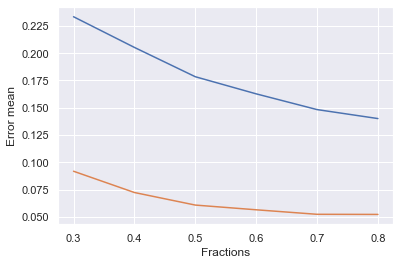

In [5]:
import numpy as np
from math import floor
import pandas as pd
from random import seed, shuffle
import seaborn as sns


def split_data(data, fraction):
    # Need data in list format to be able to use shuffle
    data = list(data)
    shuffle(data)
    # int rounds it to closest integer and gives us a separation point
    split = int(len(data) * fraction)
    train = data[:split]
    val = data[split:]
    return train, val


def one_iteration(train_data, test_data, fractions):
    fraction_errors = []

    for fraction in fractions:
        # Split data for training
        train, val = split_data(train_data, fraction)
        unpruned_tree = d.buildTree(train, m.attributes)
        # Use allPruned to generate different pruned trees
        pruned_trees = d.allPruned(unpruned_tree)
        # In case the full tree is the best tree
        best_score = d.check(unpruned_tree, val)
        best_tree = unpruned_tree
        
        # See if any pruned tree beats the full tree
        for tree in pruned_trees:
            score = d.check(tree, val)
            if best_score < score:
                best_score = score
                best_tree = tree

        fraction_errors.append(1 - d.check(best_tree, test_data))

    return fraction_errors


def multiple_iterations():
    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    monk1_errors = []
    monk3_errors = []

    # Run 1000 for better average, 100 for reasonable averages, 10 fluctuates too much
    for i in range(1000):
        monk1_errors.append(one_iteration(m.monk1, m.monk1test, fractions))
        monk3_errors.append(one_iteration(m.monk3, m.monk3test, fractions))

    # Calculate standard dev and mean from the errors
    monk1_errors = np.transpose(monk1_errors)
    monk3_errors = np.transpose(monk3_errors)
    mean1 = np.mean(monk1_errors, axis=1)
    mean3 = np.mean(monk3_errors, axis=1)
    std_dev1 = np.std(monk1_errors, axis=1)
    std_dev3 = np.std(monk3_errors, axis=1)
    
    # Need dataframe for seaborn plots
    data1 = pd.DataFrame(zip(mean1,fractions), columns=["Error mean", "Fractions"])
    data3 = pd.DataFrame(zip(mean3,fractions), columns=["Error mean", "Fractions"])
    
    # Plotting the data 
    sns.set(style="darkgrid")
    sns.lineplot(x="Fractions", y="Error mean", data=data1)
    sns.lineplot(x="Fractions", y="Error mean", data=data3)
    
    # Print data
    print("MONK-1 mean:"+str(mean1))
    print("MONK-1 std-dev:"+str(std_dev1))
    print("MONK-3 mean:"+str(mean3))
    print("MONK-3 std-dev:"+str(std_dev3))


# Seed for reproducibility 
seed(42)
multiple_iterations()

The blue line represents MONK-1, and the orange MONK-3. The best split is found at 80/20, which is a common selection for Train/Test splits. Ran 1000 iterations to smoothen out irregularities found at 10 and 100 iterations. Standard deviation details spread, which creates a band around the lines of roughly .02 on either side.
(One might have to run the section again for the plots to appear. Should take ~20 seconds on a new gen macbook pro)